(450, 375, 3)
<class 'numpy.ndarray'>


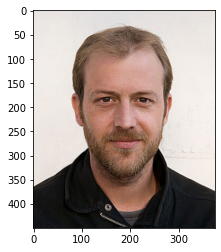

In [59]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os

file_path = os.path.join(os.getcwd(), 'dataset','image','ltp','human_face.jpg')
image = mpimg.imread(file_path)


plt.imshow(image)
print(image.shape)
print(type(image))

# Step - 1 Pre-Processings

In [60]:
import cv2 as cv

## 1- Gamma Correction

In [61]:
def adjust_gamma(image, gamma = 0.2):
    table = np.array([
                    ((i / 255.0) ** gamma) * 255 for i in np.arange(0,256)
                    ]).astype('uint8')

    return cv.LUT(image, table)

(450, 375, 3)
<class 'numpy.ndarray'>


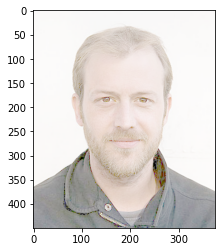

In [62]:
gamma_corrected_image = adjust_gamma(image)

plt.imshow(gamma_corrected_image)
print(gamma_corrected_image.shape)
print(type(gamma_corrected_image))

## 2- Difference of Gaussian

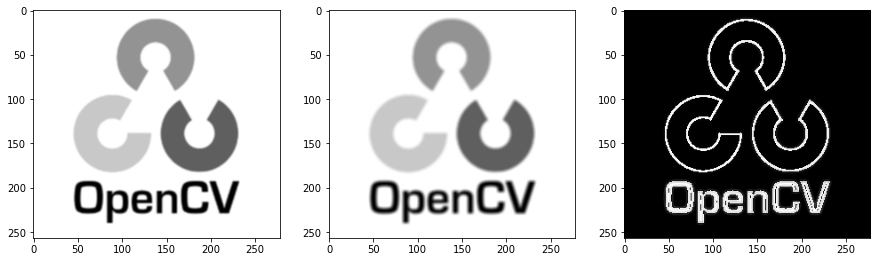

In [63]:
d_o_g_file_path = os.path.join(os.getcwd(), 'dataset','image','ltp','dog.png')
img = cv.imread(d_o_g_file_path)

low_sigma = cv.GaussianBlur(img, (3,3), 1)
high_sigma = cv.GaussianBlur(img, (5,5), 2)

d_o_g_image = low_sigma - high_sigma

fig, ax = plt.subplots(1,3, figsize = (15,8))
ax[0].imshow(low_sigma)
ax[1].imshow(high_sigma)
ax[2].imshow(d_o_g_image)

plt.show()

In [64]:
def differnce_of_gaussian_filter(img, kernel_1 = (3,3), kernel_2 = (5,5), sigmoid_1 = 1.0, sigmoid_2 = 2.0):
    low_sigma = cv.GaussianBlur(img, kernel_1, sigmoid_1)
    high_sigma = cv.GaussianBlur(img, kernel_2, sigmoid_2)

    return low_sigma - high_sigma

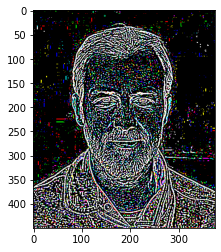

In [65]:
plt.imshow(differnce_of_gaussian_filter(gamma_corrected_image))

# Step -2 LTP

In [67]:
import imageio
from skimage import feature

In [72]:
def lbp_features(img , radius = 1, sampling_pixels = 8):
    if len(img.shape) > 2:
        img = img.astype(float)

        #Converting RGB to grayscale using Luminance
        img = img[:,:,0] * 0.3 + img[:,:,1] * 0.59 + img[:,:,2] * 0.11

        #Converting to uint8 type for 256 gray levels
        img = img.astype(np.uint8)


        # normalize values help improving description
        i_min = np.min(img)
        i_max = np.max(img)
        if i_min - i_max != 0:
            img = (img - i_min)/ (i_max - i_min)

        #Computing LBP
        lbp = feature.local_binary_pattern(img, sampling_pixels, radius , method = "uniform")

        #LBP return a matrix with the coes so we compute the histogram
        (hist, _) = np.histogram(lbp.ravel(), bins = np.arange(0, sampling_pixels + 3), range = (0, sampling_pixels + 2))

        #normalize a histogram
        hist = hist.astype('float')
        hist /= (hist.sum() + 1e-6)

        return hist



In [73]:
def euclidean_distance(p,q):
    dist = np.sqrt(np.sum(np.square(p-q)))
    return dist

Text(0.5, 1.0, 'Rank 5 : 0.2594')

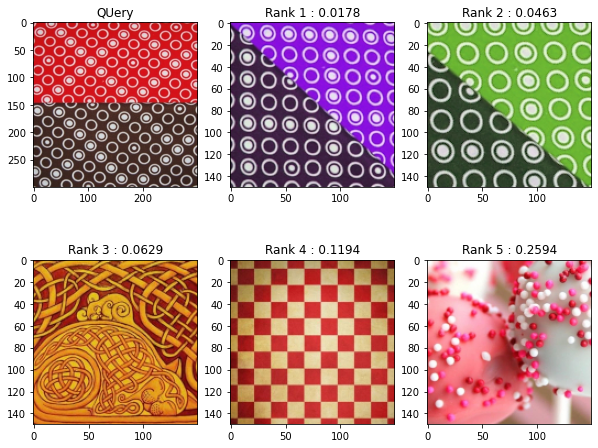

In [75]:
img1 = imageio.imread("dataset/image/ltp/texture_dotted.jpg")
img2 = imageio.imread("dataset/image/ltp/texture_dotted3.jpg")
img3 = imageio.imread("dataset/image/ltp/texture_dotted2.jpg")
img4 = imageio.imread("dataset/image/ltp/texture_interlaced.jpg")
img5 = imageio.imread("dataset/image/ltp/texture_chequered.jpg")
img6 = imageio.imread("dataset/image/ltp/texture_sprinkled.jpg")

lbp1 = lbp_features(img1)
lbp2 = lbp_features(img2)
lbp3 = lbp_features(img3)
lbp4 = lbp_features(img4)
lbp5 = lbp_features(img5)
lbp6 = lbp_features(img6)

dQ2_H = euclidean_distance(lbp1, lbp2)
dQ3_H = euclidean_distance(lbp1, lbp3)
dQ4_H = euclidean_distance(lbp1, lbp4)
dQ5_H = euclidean_distance(lbp1, lbp5)
dQ6_H = euclidean_distance(lbp1, lbp6)

plt.figure(figsize=(10,8))
plt.subplot(231); plt.imshow(img1); plt.title('QUery')
plt.subplot(232); plt.imshow(img2); plt.title('Rank 1 : %.4f' % dQ2_H)
plt.subplot(233); plt.imshow(img3); plt.title('Rank 2 : %.4f' % dQ3_H)
plt.subplot(234); plt.imshow(img4); plt.title('Rank 3 : %.4f' % dQ4_H)
plt.subplot(235); plt.imshow(img5); plt.title('Rank 4 : %.4f' % dQ5_H)
plt.subplot(236); plt.imshow(img6); plt.title('Rank 5 : %.4f' % dQ6_H)